In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import re
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm
from scipy import stats
from scipy.stats import linregress


In [55]:

goodreads = pd.DataFrame.from_csv('/Users/witte/goodreads/goodreads.csv')
goodreads = goodreads.loc[(goodreads['pubyear'] > 1979) & (goodreads['pubyear'] < 2018), ]
goodreads['genre'].replace('New Adult','Young Adult', inplace=True)
goodreads.head()

,avgrating,awards,five_stars,four_stars,genre,numpages,one_stars,origpubdate,pubyear,pubdate,publisher,three_stars,title,totalratings,totalreviews,two_stars
author,,,,,,,,,,,,,,,,
David Levithan,3.85,NaN,19217,17057,Young Adult,185,2178,September 9th 2003,2003,May 10th 2005,Alfred A. Knopf,13110,Boy Meets Boy,55486,3404,3924
Misty Bernall,3.90,NaN,4766,3883,Nonfiction,140,358,September 9th 1999,1999,January 1st 2002,Plough Publishing House,3117,She Said Yes: The Unlikely Martyrdom of Cassie...,13062,633,938
Nicholas D. Kristof,4.30,NaN,22760,13754,Nonfiction,294,533,September 8th 2008,2008,September 8th 2009,Knopf Publishing Group,5525,Half the Sky: Turning Oppression Into Opportun...,43828,4806,1256
Nicholas Sparks,4.14,Goodreads Choice Award for Chick Lit (2009),206519,146877,Romance,390,7613,September 8th 2008,2008,September 8th 2009,Grand Central Publishing,81001,The Last Song,460561,11294,18551
Susanna Clarke,3.81,"Hugo Award for Best Novel (2005),Man Booker Pr...",56990,52046,Historical,1006,8534,September 8th 2004,2004,August 1st 2006,Tor Books,33035,Jonathan Strange & Mr Norrell,165445,12138,14840


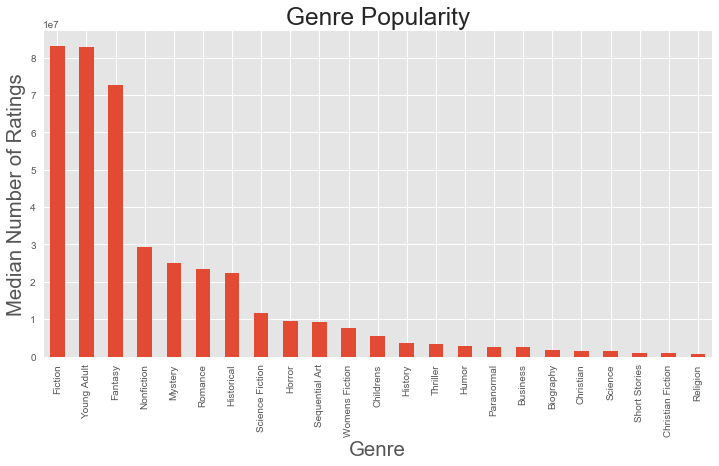

In [59]:
#removes low-end outliers from genre count to determin median number of ratings
#plots number of ratings by genre

filtered_gg=goodreads.groupby('genre').filter(lambda x: len(x)>40)
plt.figure(figsize=(12,6))
filtered_gg.groupby('genre')['totalratings'].sum().sort_values(ascending=False).plot.bar()
plt.xlabel('Genre')
plt.ylabel('Median Number of Ratings')
plt.title('Genre Popularity')

plt.rcParams.update({'font.size': 17})
#followup - plot rise of new adult/young adult books over time


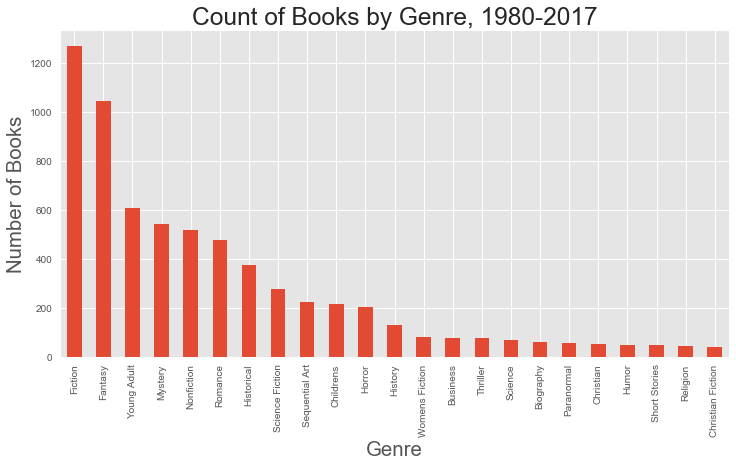

In [57]:
filtered_gg=goodreads.groupby('genre').filter(lambda x: len(x)>40)
plt.figure(figsize=(12,6))
filtered_gg.groupby('genre')['genre'].count().sort_values(ascending=False).plot.bar()
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.title('Count of Books by Genre, 1980-2017')
plt.rcParams.update({'font.size': 17})


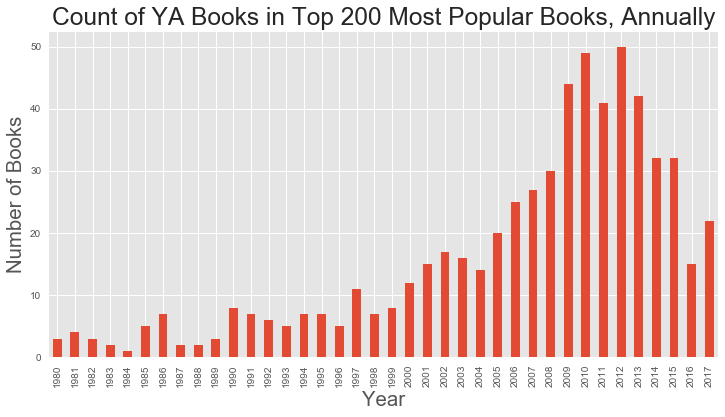

In [58]:
plt.figure(figsize=(12,6))
ya_filter = goodreads[goodreads['genre'] == 'Young Adult']
ya_filter.groupby('pubyear')['genre'].count().plot.bar()
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.title('Count of YA Books in Top 200 Most Popular Books, Annually')
plt.rcParams.update({'font.size': 17})


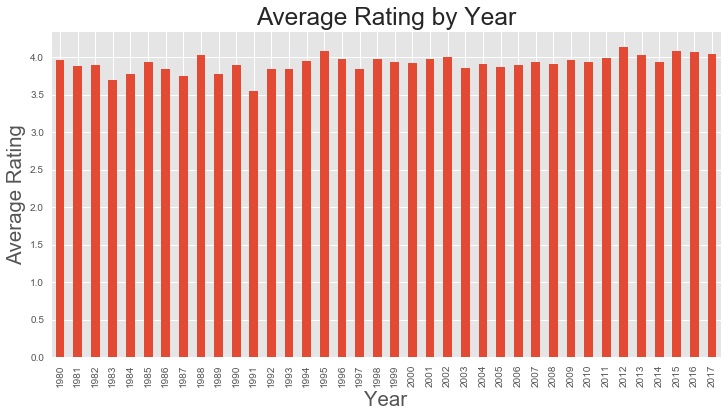

In [60]:
plt.figure(figsize=(12,6))
ya_filter.groupby('pubyear')['avgrating'].median().plot.bar()
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating by Year')

plt.rcParams.update({'font.size': 18})

In [61]:
#counting the number of awards each book has received

awards_grouping = goodreads
awards_grouping['awards']=awards_grouping['awards'].fillna('0')
awards_grouping['numawards']= awards_grouping['awards'].str.split(',').str.len()
awards_grouping.loc[awards_grouping["awards"]=='0', 'numawards']=0
awards_grouping.head()


#extraneous code

#awards_grouping = filtered_gg.loc[filtered_gg['awards'].isnull()==False]
#awards_grouping['awards'].str.split(',').agg(len)
# awards_grouping['numawards'] = awards_grouping['numawards'].fillna(0)


,avgrating,awards,five_stars,four_stars,genre,numpages,one_stars,origpubdate,pubyear,pubdate,publisher,three_stars,title,totalratings,totalreviews,two_stars,numawards
author,,,,,,,,,,,,,,,,,
David Levithan,3.85,0,19217,17057,Young Adult,185,2178,September 9th 2003,2003,May 10th 2005,Alfred A. Knopf,13110,Boy Meets Boy,55486,3404,3924,0
Misty Bernall,3.90,0,4766,3883,Nonfiction,140,358,September 9th 1999,1999,January 1st 2002,Plough Publishing House,3117,She Said Yes: The Unlikely Martyrdom of Cassie...,13062,633,938,0
Nicholas D. Kristof,4.30,0,22760,13754,Nonfiction,294,533,September 8th 2008,2008,September 8th 2009,Knopf Publishing Group,5525,Half the Sky: Turning Oppression Into Opportun...,43828,4806,1256,0
Nicholas Sparks,4.14,Goodreads Choice Award for Chick Lit (2009),206519,146877,Romance,390,7613,September 8th 2008,2008,September 8th 2009,Grand Central Publishing,81001,The Last Song,460561,11294,18551,1
Susanna Clarke,3.81,"Hugo Award for Best Novel (2005),Man Booker Pr...",56990,52046,Historical,1006,8534,September 8th 2004,2004,August 1st 2006,Tor Books,33035,Jonathan Strange & Mr Norrell,165445,12138,14840,5


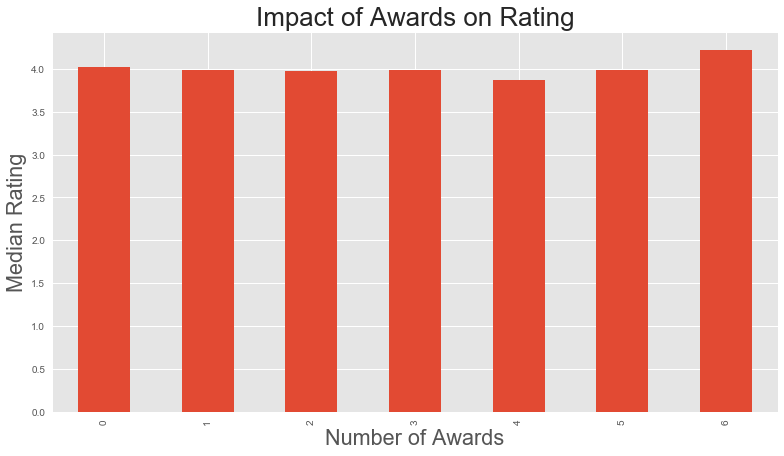

In [62]:
#Proving awards have abosulutely no impact on how much people like books

plt.figure(figsize = (13,7))
awards_grouping.groupby('numawards')['avgrating'].median().plot.bar()
plt.xlabel('Number of Awards')
plt.ylabel('Median Rating')
plt.title('Impact of Awards on Rating')
plt.rcParams.update({'font.size': 17})


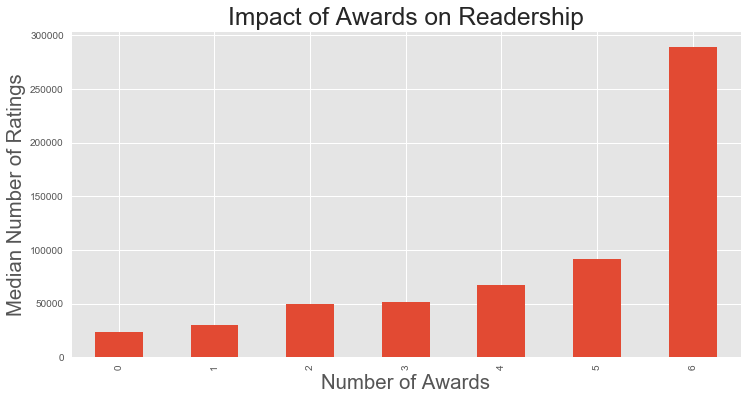

In [63]:
#On the other hand, suggesting that the more awards you get, the more people read your book - though it's a chicken/egg
# unless you have access to award date and when marked as read

plt.figure(figsize = (12,6))
awards_grouping.groupby('numawards')['totalratings'].median().plot.bar()
plt.xlabel('Number of Awards')
plt.ylabel('Median Number of Ratings')
plt.title('Impact of Awards on Readership')
plt.rcParams.update({'font.size': 17})


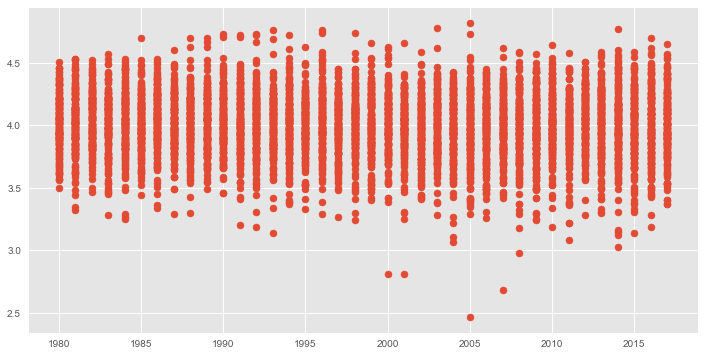

In [16]:
plt.figure(figsize = (12,6))
ratings_by_year = goodreads[['pubyear', 'avgrating']].dropna()
plt.scatter(ratings_by_year['pubyear'], ratings_by_year['avgrating'])


#Need to set range to 1980-2017. All data outside is invalid

In [64]:
#statistical summary of data with avg rating, numpages, pubyear and numawards and independent
# variables and totalratings as dependent

X5 = sm.add_constant(awards_grouping[awards_grouping.columns[[0,5,8,16]]]) # independent variables
y5 = awards_grouping.totalratings # dependent variable
est = sm.OLS(y5,X5)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           totalratings   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     102.1
Date:                Tue, 15 May 2018   Prob (F-statistic):           1.14e-84
Time:                        21:22:56   Log-Likelihood:                -96388.
No. Observations:                7168   AIC:                         1.928e+05
Df Residuals:                    7163   BIC:                         1.928e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.324e+06   3.66e+05    -11.822      0.000   -5.04e+06   -3.61e+06
avgrating   4.761e+04   8352.905      5.700      0.000    3.12e+04     6.4e+04
numpages      22.2194      9.509      2.337      0.019       3.580      40.859
pubyear     2090.1449    181.517     11.515      0.000    1734.318    2445.972
numawards   3.308e+04   2318.832     14.267      0.000    2.85e+04    3.76e+04
==============================================================================
Omnibus:                    13956.443   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39868627.543
Skew:                          15.274   Prob(JB):                         0.00
Kurtosis:                     367.082   Cond. No.                     3.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:

linregress(awards_grouping['avgrating'], awards_grouping['totalratings'])


LinregressResult(slope=41476.018700180575, intercept=-106921.63936072125, rvalue=0.0579667834072429, pvalue=9.0624283415734903e-07, stderr=8438.1760549519131)

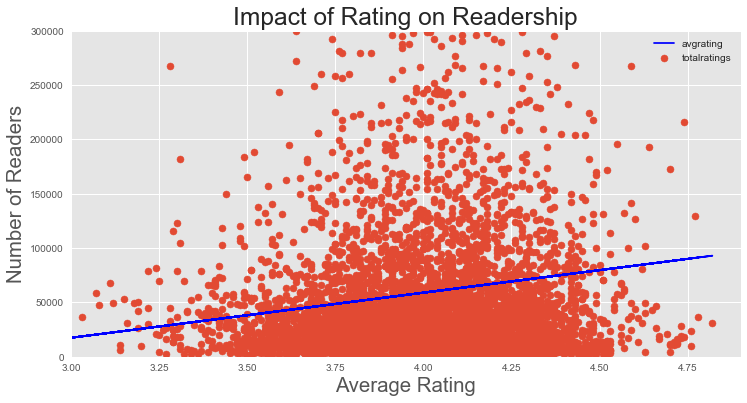

In [66]:
#plotting a linear regression line over a graph of x = avgrating, y = totalratings


linregress(awards_grouping['avgrating'], awards_grouping['totalratings'])


plt.figure(figsize = (12,6))
plt.scatter(awards_grouping['avgrating'], awards_grouping['totalratings'])
plt.ylim(0, 300000)
#plt.xlim(3.5,4.5)
linregress(awards_grouping['avgrating'], awards_grouping['totalratings'])
plt.xlim(3.,4.9)
plt.xlabel('Average Rating')
plt.ylabel('Number of Readers')
plt.title('Impact of Rating on Readership')


f = lambda x: 41476.018700180575*x -106921.63936072125
# x values of line to plot
x = awards_grouping['avgrating']
# plot fit
plt.plot(x,f(x), c="blue")

#better take min and max of x values
#
plt.legend()
plt.show()
plt.rcParams.update({'font.size': 17})


In [20]:

# # sns.set_style('ticks')
# fig, ax = plt.subplots()

# fig.set_size_inches(20, 12)
# plt.xticks(rotation=45)

# sns.boxplot(x='totalratings', y='avgrating', data=awards_grouping,width = 0.8)


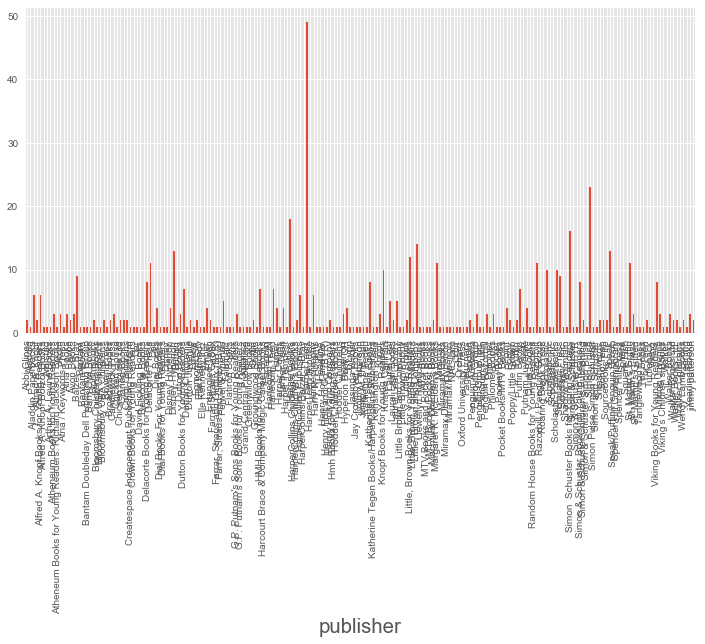

In [67]:
plt.figure(figsize=(12,6))
ya_filter.groupby('publisher')['totalratings'].count().plot.bar()

In [22]:
# plt.figure(figsize=(12,6))
# ya_filter = goodreads[goodreads['genre'] == 'Young Adult']
# ya_filter.groupby('pubyear')['genre'].count().plot.bar()


# from sklearn import linear_model
# reg = linear_model.Lasso(alpha = 0.1)
# reg.fit([[0, 0], [1, 1]], [0, 1])
# Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
#    normalize=False, positive=False, precompute=False, random_state=None,
#    selection='cyclic', tol=0.0001, warm_start=False)
# reg.predict([[1, 1]])
# array([ 0.8])


In [68]:
publisher_filter.head()

,publisher,totalratings
0,Avon,2406563
1,Ballantine Books,5460888
2,Bantam,8141774
3,Grand Central Publishing,7046017
4,HarperCollins,6525651


In [69]:
publisher_filter.groupby('publisher')['totalratings'].sum().sort_values(ascending=False)

publisher
Little, Brown and Company    15795183
Bantam                        8141774
Vintage                       7807102
Grand Central Publishing      7046017
HarperCollins                 6525651
Penguin Books                 6375368
Ballantine Books              5460888
Pocket Books                  3382399
Avon                          2406563
Name: totalratings, dtype: int64

In [95]:
publisher_filter = publisher_filter.groupby(['publisher']).agg({'totalratings': 'sum'}).reset_index()

In [96]:
publisher_filter

,publisher,totalratings
0,Avon,2406563
1,Ballantine Books,5460888
2,Bantam,8141774
3,Grand Central Publishing,7046017
4,HarperCollins,6525651
5,"Little, Brown and Company",15795183
6,Penguin Books,6375368
7,Pocket Books,3382399
8,Vintage,7807102


In [97]:
publisher_filter['totalratings_millions'] = publisher_filter['totalratings']/100000

In [98]:
publisher_filter

,publisher,totalratings,totalratings_millions
0,Avon,2406563,24.06563
1,Ballantine Books,5460888,54.60888
2,Bantam,8141774,81.41774
3,Grand Central Publishing,7046017,70.46017
4,HarperCollins,6525651,65.25651
5,"Little, Brown and Company",15795183,157.95183
6,Penguin Books,6375368,63.75368
7,Pocket Books,3382399,33.82399
8,Vintage,7807102,78.07102


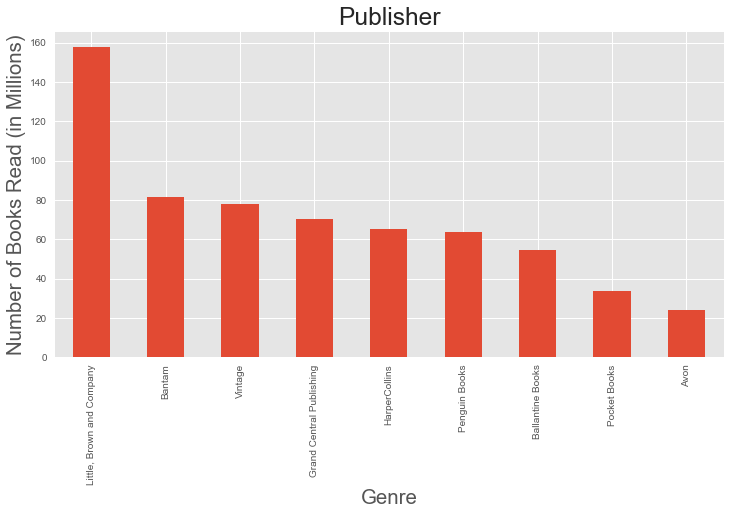

In [107]:
#publisher_filter=goodreads.groupby('publisher').filter(lambda x: len(x)>80)
plt.figure(figsize=(12,6))
# x = publisher_filter['publisher']
# y = publisher_filter['totalratings_millions']
publisher_filter.groupby('publisher')['totalratings_millions'].sum().sort_values(ascending=False).plot.bar()
plt.xlabel('Genre')
plt.ylabel('Number of Books Read (in Millions)')
plt.title('Publisher')

plt.rcParams.update({'font.size': 17})


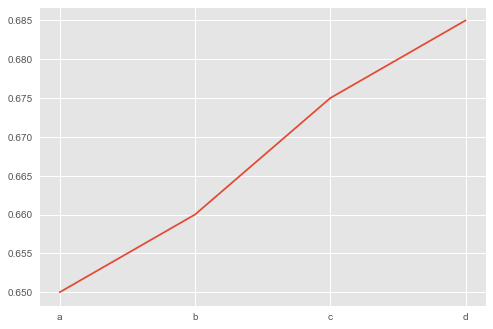

In [25]:
x = np.array([0,1,2,3])
y = np.array([0.650, 0.660, 0.675, 0.685])
my_xticks = ['a', 'b', 'c', 'd']
plt.xticks(x, my_xticks)
plt.yticks(np.arange(y.min(), y.max(), 0.005))
plt.plot(x, y)
plt.grid(axis='y', linestyle='-')
plt.show()